## Datasets & DataLoaders

> Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples. <br>
>[pytorch Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


**arguments:**
* `root` is the path where the train/test data is stored,

* `train` specifies training or test dataset,

* `download=True` downloads the data from the internet if it’s not available at root.

* `transform` and `target_transform` specify the feature and label transformations

In [11]:
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt

In [17]:
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True)

In [18]:
import sys

sys.getsizeof(train_dataset)

48

In [19]:
image, label = train_dataset[0]

In [20]:
image

In [21]:
label

5

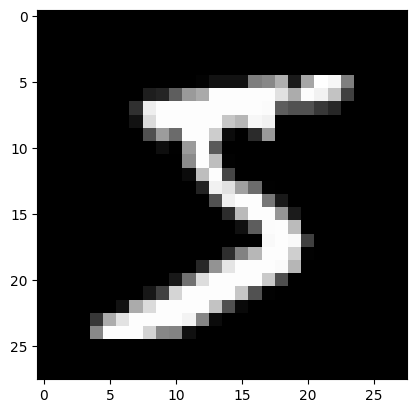

In [22]:
plt.imshow(image, cmap='gray')

In [23]:
len(train_dataset)

60000

### Transform module

* ToTensor
* Normalize
* Compose

#### 1. `ToTensor()`

In [28]:
# transform = torchvision.transforms.ToTensor()
# transform(image)
image_tensor = torchvision.transforms.ToTensor()(image)
type(image_tensor)

torch.Tensor

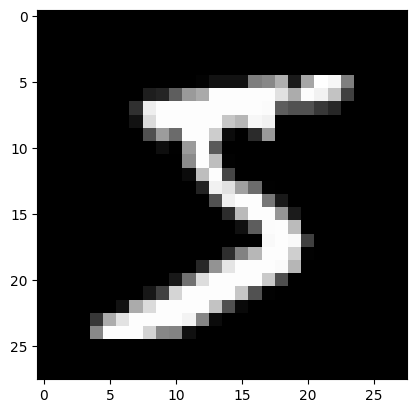

In [29]:
plt.imshow(iamge_tensor[0], cmap='gray')

#### 2.`Normalize()`

In [34]:
normalized_image_tensor = torchvision.transforms.Normalize(mean=(0.5,),std=(0.5,))(iamge_tensor)
normalized_image_tensor

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [36]:
normalized_image_tensor.min(), normalized_image_tensor.max()

(tensor(-1.), tensor(1.))

#### 3. `.Compose()`

In [14]:
transform = transformed_iamge = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,),std=(0.5,))])

In [39]:
transformed_image = transform(image)

In [41]:
transformed_image.shape

torch.Size([1, 28, 28])

In [42]:
train_dataset = torchvision.datasets.MNIST('./mnist_data', 
                                           train=True, 
                                           download=True,
                                          transform=transform)

In [43]:
image, label = train_dataset[0]
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

### DataLoader

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

**Parameters:**
* **dataset**:   dataset from which to load the data.
* **batch_size**(int, optional) – how many samples per batch to load (default: 1)
* **shuffle**(bool, optional) - set to True to have the data reshuffled at every epoch (default: False)
* **num_workers** (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)<br>


[other parameters in `torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

In [15]:
train_dataset = torchvision.datasets.MNIST('./mnist_data', 
                                           train=True, 
                                           download=True,
                                           transform=transform)
val_dataset = torchvision.datasets.MNIST('./mnist_data',
                                         train=False, 
                                         download=True,
                                         transform=transform)

In [5]:
from torch.utils.data import DataLoader

In [47]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=10, num_workers=2)

In [49]:
images, labels = next(iter(train_loader))
print(images.shape)

torch.Size([10, 1, 28, 28])


`torch.Size([10, 1, 28, 28])`

`torch.Size(batch_size, channel, height, width`)

`plt.show`plt.imshow(images[0])` throws an error.
To visualize these images, you need to use `torchvision.utils.make_grid`

`images` have 4 ranks `torch.Size([10, 1, 28, 28])` and you need to change them to 3 ranks like `torch.Size([3, 62, 242])` to visualize with `plt.imshow()`

In [50]:
grid_images = torchvision.utils.make_grid(images)

In [52]:
grid_images.shape

torch.Size([3, 62, 242])

In [53]:
import torch

change the order of data.
PIL has a (H,W,C) structure while tensor has (C,H,W)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


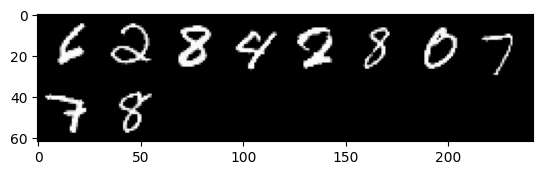

In [54]:
plt.imshow(torch.permute(grid_images,(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


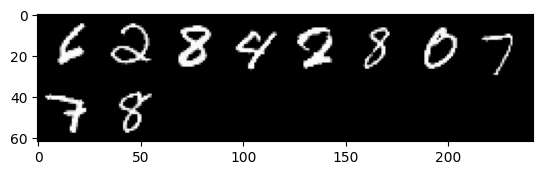

In [56]:
# de-normalize
grid_iamges = grid_images/ 2 + 0.5
plt.imshow(torch.permute(grid_images,(1,2,0)))

In [58]:
labels

tensor([6, 2, 8, 4, 2, 8, 0, 7, 7, 8])

### Integrate dataloader with learning loop

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
from torch import optim
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
import torchvision

In [6]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.flatten = nn.Flatten()  # flatten llayer [b,c,h,w] -> [b, cxhxw]
        self.l1 = nn.Linear(num_in, num_hidden)
        self.l2 = nn.Linear(num_hidden, num_out)

    def forward(self, X):
        flatten_X = self.flatten(X)
        z1 = self.l1(flatten_X)
        a1 = F.relu(z1)
        x = self.l2(a1)

        return x
       

In [16]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

epochs = 5
num_feature = 28*28
num_hidden = 30
num_class = 10

learning_rate = 0.03

model = MLP(num_feature, num_hidden, num_class)
opt = optim.SGD(params=model.parameters(), lr=learning_rate) # SGD : stochastic gradient descent algorithm

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    
    running_loss = 0
    running_val_loss = 0
    running_val_acc = 0
    
    for train_batch, data in enumerate(train_loader):

        X, y = data

        opt.zero_grad()
        preds = model(X)
        loss = F.cross_entropy(preds, y)
        running_loss += loss.item()
        
        loss.backward()
        opt.step()

    # validation
    with torch.no_grad():
        for val_batch, data in enumerate(val_loader):
            
            X_val, y_val = data
            
            preds_val = model(X_val)
            val_loss = F.cross_entropy(preds_val, y_val)
            running_val_loss += val_loss.item()
            val_accuracy = torch.sum(torch.argmax(preds_val, dim=1)==y_val) / y_val.shape[0]
            running_val_acc += val_accuracy.item()

    train_losses.append(running_loss/(train_batch+1))
    val_losses.append(running_val_loss/(val_batch+1))
    val_accuracies.append(running_val_acc/(val_batch +1))

    print(f'epoch: {epoch}: train error: {train_losses[-1]}, validation error: {val_losses[-1]}, validation accuracy: {val_accuracies[-1]}')

epoch: 0: train error: 0.44409853607813515, validation error: 0.31607545983081997, validation accuracy: 0.9016573482428115
epoch: 1: train error: 0.2622326503296693, validation error: 0.24304315271064306, validation accuracy: 0.9260183706070287
epoch: 2: train error: 0.21193507529298464, validation error: 0.20881030112862015, validation accuracy: 0.9354033546325878
epoch: 3: train error: 0.18233320717761914, validation error: 0.17892395434960628, validation accuracy: 0.9479832268370607
epoch: 4: train error: 0.16387099779347578, validation error: 0.16254999028137937, validation accuracy: 0.9517771565495208


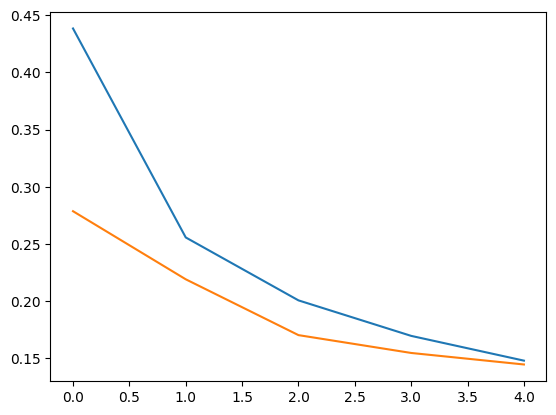

In [87]:
plt.plot(train_losses)
plt.plot(val_losses)

### Custom Dataset

In [89]:
from torch.utils.data import Dataset

In [97]:
class MyDataset(Dataset):
    def __init__(self,X,y,transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)

        return X, y

In [105]:
dataset = datasets.load_digits()
data = dataset['data']
target = dataset['target']
images = dataset['images']
images = images * (255. / 16.) # 0-16 -> 0-255
images.astype(np.int8)
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size=0.2, random_state=42)

In [106]:
train_mydataset = MyDataset(X_train, y_train)

In [107]:
len(train_mydataset)

1437

In [108]:
train_mydataset[0]

(array([[  0.    ,   0.    ,  47.8125, 223.125 ,  15.9375,   0.    ,
           0.    ,   0.    ],
        [  0.    ,   0.    , 191.25  , 191.25  ,   0.    ,   0.    ,
           0.    ,   0.    ],
        [  0.    ,  47.8125, 255.    ,  95.625 ,   0.    ,   0.    ,
           0.    ,   0.    ],
        [  0.    ,  79.6875, 255.    ,  31.875 ,   0.    ,   0.    ,
           0.    ,   0.    ],
        [  0.    ,  95.625 , 255.    ,  31.875 ,  79.6875,  31.875 ,
           0.    ,   0.    ],
        [  0.    ,  63.75  , 255.    ,  31.875 , 191.25  , 239.0625,
          31.875 ,   0.    ],
        [  0.    ,  15.9375, 223.125 , 207.1875,  31.875 , 207.1875,
         175.3125,   0.    ],
        [  0.    ,   0.    ,  47.8125, 175.3125, 255.    , 207.1875,
          63.75  ,   0.    ]]),
 6)

`transform.ToTensor()` converts 0-255 -> 0-1.
The original images have 0-16 range. You need to re-arange the data range before using this function

In [110]:
from torchvision import transforms

In [111]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5),(.5))
])

In [112]:
train_mydataset = MyDataset(X_train, y_train, transform=transform)

In [113]:
train_mydataset[0]

(tensor([[[ -1.0000,  -1.0000,  94.6250, 445.2500,  30.8750,  -1.0000,  -1.0000,
            -1.0000],
          [ -1.0000,  -1.0000, 381.5000, 381.5000,  -1.0000,  -1.0000,  -1.0000,
            -1.0000],
          [ -1.0000,  94.6250, 509.0000, 190.2500,  -1.0000,  -1.0000,  -1.0000,
            -1.0000],
          [ -1.0000, 158.3750, 509.0000,  62.7500,  -1.0000,  -1.0000,  -1.0000,
            -1.0000],
          [ -1.0000, 190.2500, 509.0000,  62.7500, 158.3750,  62.7500,  -1.0000,
            -1.0000],
          [ -1.0000, 126.5000, 509.0000,  62.7500, 381.5000, 477.1250,  62.7500,
            -1.0000],
          [ -1.0000,  30.8750, 445.2500, 413.3750,  62.7500, 413.3750, 349.6250,
            -1.0000],
          [ -1.0000,  -1.0000,  94.6250, 349.6250, 509.0000, 413.3750, 126.5000,
            -1.0000]]], dtype=torch.float64),
 6)

In [114]:
train_mydataset = MyDataset(X_train, y_train, transform=transform)
val_mydataset = MyDataset(X_val, y_val, transform=transform)

In [115]:
train_myloader = DataLoader(train_mydataset, batch_size=10, shuffle=True, num_workers=2)
val_myloader = DataLoader(val_mydataset, batch_size=10, num_workers=2)

In [116]:
images, labels = next(iter(train_myloader))

In [118]:
images.shape

torch.Size([10, 1, 8, 8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


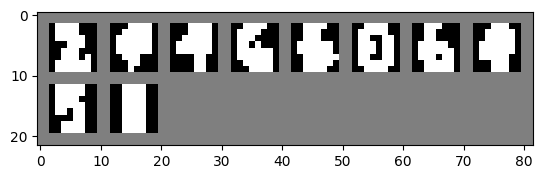

In [123]:
grid_images = torchvision.utils.make_grid(images)
grid_images = grid_images / 2 +0.5
plt.imshow(torch.permute(grid_images, (1,2,0)))